# 通过微博内容进行用户性别画像

## 题目背景
>用户画像是在大数据背景下，互联网业内兴起的一种对用户进行精细化分析的系统工作，其目的是通过对用户的特征属性，行为模式等进行有效的数据挖掘和算法分析，从而得到用户的偏好，兴趣，爱好，观点等标签信息，进而实现互联网+时代内的个性化精准营销，服务与推荐等服务，对于新时代的互联网公司具有重大战略作用。 微博作为社交网络媒介，该有向图网络内包含大量的UGC内容，包括文本内容，用户行为，有向图结构等等，根据这些信息对用户进行画像对微博的运营与发展非常重要。

>本题目的内容是给定一定量的微博数据，对用户进行性别画像，也就是通过用户的个人信息，微博内容情况等，挖掘用户的性别属性。

## 文本挖掘常规流程


	1. 业务理解
	2. 数据预处理（数据清洗，合并）
	3. 特征提取（分词 ，停用词，高频词，词向量表示，增加数据权重）
	4. 数据降维
	5. 模型选择
	6. 结果验证与参数调优
    
## Python实现
   1. pandas 数据处理包
   2. sklearn 机器学习包
   3. gensim 自然语言处理
   

## 1. 业务理解

### 有什么数据？

In [178]:
#查看微博用户信息
path_user_info = 'c:/train_data1/train_user_infos_1.txt'
f_user_info = open(path_user_info, encoding='utf-8')
for x in range(3):
    print(f_user_info.readline()) 
f_user_info.close()

用户ID	地区	性别	粉丝数	关注数	微博数	生日	签名	

eec8cdfdb1165b14f1fff87fc53360c3	河南	男	19	64	101	1998-02-21 16:00:00	冷暖自知

7a0a488f0aa6be5e0ecd5e406310e571	福建	女	1059	535	722	1996-03-03 16:00:00	我是一个上进的玉米



In [177]:
#查看微博内容
path_weibos = 'c:/train_data1/train_user_weibos_1.txt'
f_weibos = open(path_weibos, encoding='utf-8')
for x in range(3):
    print(f_weibos.readline()) 
f_weibos.close()

用户ID	评论数	赞数	转发数	时间	来源	内容	

eec8cdfdb1165b14f1fff87fc53360c3	0	0	0	2016-08-13 20:39:00	OPPO R3	谁说运动就是拼步数，只要够努力日行1000步一样拿奖励！我已领取了蜗牛侠的限量勋章，你还不动起来吗？

eec8cdfdb1165b14f1fff87fc53360c3	0	0	0	2016-07-28 08:54:00	OPPO R3	『推荐有奖』



### 怎么用？

通过微博内容中的关键词


### 其他可用的信息？

## 2. 数据预处理

* 数据加载
* 异常数据清洗
* 数据合并、关联

In [8]:
#数据加载
import pandas as pd

df_user_info = pd.read_csv('c:/train_data1/small/train_user_info_small.csv',encoding='utf-8')
df_weibos = pd.read_csv('c:/train_data1/small/train_weibos_small.csv',encoding='utf-8')

In [11]:
df_user_info.head(2)

user_id       10000
city           9998
sex            9998
fans_num      10000
follow_num    10000
weibo_num     10000
birth          5655
sign           7194
dtype: int64

In [10]:
df_weibos.head(2)

,user_id,commen_num,like_num,repost_num,time,device,content
0,eec8cdfdb1165b14f1fff87fc53360c3,0,0,0,2016-07-28 08:54:00,OPPO R3,『推荐有奖』
1,eec8cdfdb1165b14f1fff87fc53360c3,0,0,0,2016-07-28 07:15:00,微博等级,只要升等级就有福利享，变身土豪就靠它，想想就有点小激动呢[太开心]小伙伴儿们速来围观，领取你的


In [16]:
#df_user_info.count()
#df_user_info.describe()
df_weibos.count()
df_weibos.describe()

,commen_num,like_num,repost_num
count,1.157303e+06,1.157303e+06,1.157303e+06
mean,6.128494e+00,8.542078e+01,6.313411e+00
std,3.938604e+02,4.859770e+03,3.291131e+02
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,1.000000e+00,0.000000e+00
max,3.220540e+05,1.025145e+06,1.727890e+05


In [34]:
df_user_info.user_id.nunique()

10000

In [22]:


#总体统计  count 发现空值
pd_user_info.count()
#删除空值
pd_user_info = pd_user_info[~pd_user_info.sex.isnull()]
pd_user_info.count()

user_id       9998
city          9998
sex           9998
fans_num      9998
follow_num    9998
weibo_num     9998
birth         5655
sign          7194
dtype: int64

In [ ]:

#按性别分组，查看各指标差异
pd_user_info.groupby('sex').mean()

#数据分析，四分点
#pd_user_info.fans_num.describe()


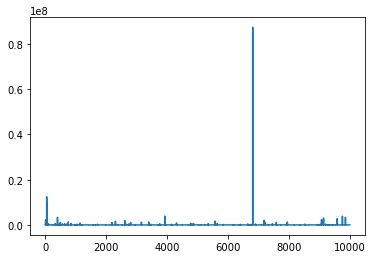

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

#图
plt.plot(pd_user_info.fans_num)

In [18]:
#大V
pd_user_info.sort_values('fans_num',ascending=False)[:2]

,user_id,city,sex,fans_num,follow_num,weibo_num,birth,sign
6810,6799c378be425945bc9e1a57a85f4d84,北京,女,87422721.0,666.0,8951.0,NaN,太阳女神（也可称为喜神）的光芒照四方呀嘛照四方：）工作邮箱：w761324@qq.com（仅...
42,73b2643c31a7e33e57776ac6725fa3e0,其他,男,12430599.0,362.0,60172.0,NaN,新浪微博内容最多的猛料集聚地，最新最热门的分享平台……24小时为您放送热门微博，实在是您居家...


In [234]:
#微博数据
pd_weibos.head(2)

,user_id,commen_num,like_num,repost_num,time,device,content
0,eec8cdfdb1165b14f1fff87fc53360c3,0,0,0,2016-07-28 08:54:00,OPPO R3,『推荐有奖』
1,eec8cdfdb1165b14f1fff87fc53360c3,0,0,0,2016-07-28 07:15:00,微博等级,只要升等级就有福利享，变身土豪就靠它，想想就有点小激动呢[太开心]小伙伴儿们速来围观，领取你的


In [166]:
#内容为空记录剔除
pd_weibos.count()

user_id       1157303
commen_num    1157303
like_num      1157303
repost_num    1157303
time          1157303
device         993431
content       1133409
dtype: int64

In [236]:
import numpy as np
#设备分析
pd_weibos.groupby('device').count().sort_values(by='user_id',ascending=False)[:5]

,user_id,commen_num,like_num,repost_num,time,content
device,,,,,,
微博 weibo.com,127834,127834,127834,127834,127834,125791
iPhone 6,89677,89677,89677,89677,89677,88263
iPhone 6s,50736,50736,50736,50736,50736,49872
iPhone 6 Plus,46116,46116,46116,46116,46116,45353
iPhone 5s,39124,39124,39124,39124,39124,38316


In [225]:

#按性别进行分析
#pd_weibos.set_index('user_id')
#pd_user_info.set_index('user_id')

pd_join = pd.merge(pd_weibos,pd_user_info[['user_id','sex']], how = 'inner')
pd_join.groupby('sex').device.count()
'''
sex
女    636586
男    356518
'''

rate = 636586/356518
pivot_table = pd_join.pivot_table(index='device',columns='sex',aggfunc ='count',values='user_id',fill_value=1)

pivot_table['count_all'] = pivot_table.男 + pivot_table.女
pivot_table['comp_val']  = np.maximum(pivot_table.男/pivot_table.女*rate, 1/(pivot_table.男/pivot_table.女*rate))
pivot_table['comp_flag']  = np.greater(pivot_table.男/pivot_table.女*rate, 0.5)
#男性偏好终端
high_comp_dev_male = pivot_table[(pivot_table.comp_val>3) & pivot_table.comp_flag].sort_values(by='comp_val',ascending=False)
high_comp_dev_female = pivot_table[(pivot_table.comp_val>3) & ~pivot_table.comp_flag].sort_values(by='comp_val',ascending=False)

In [229]:
high_comp_dev_female[high_comp_dev_female.count_all>1500]
#high_comp_dev_male[high_comp_dev_male.count_all>1000]

sex,女,男,count_all,comp_val,comp_flag
device,,,,,
OPPO R7s,2095,160,2255,7.333114,False
明星势力榜,2429,309,2738,4.402440,False
vivo X5Pro,1619,214,1833,4.236990,False
万人迷OPPO R7,4208,579,4787,4.070254,False
够快才畅快vivo X6,1974,280,2254,3.948330,False
OPPO智能手机,8142,1211,9353,3.765402,False
魅族 MX4,2223,343,2566,3.629692,False
vivo智能手机,9524,1525,11049,3.497630,False
三星GALAXY Note 4,1388,226,1614,3.439580,False


### 结巴分词 https://github.com/fxsjy/jieba

#### jieba

“结巴”中文分词：做最好的 Python 中文分词组件

"Jieba" (Chinese for "to stutter") Chinese text segmentation: built to be the best Python Chinese word segmentation module.

Scroll down for English documentation.
#### 特点

* 支持三种分词模式：

    - 精确模式，试图将句子最精确地切开，适合文本分析；
    - 全模式，把句子中所有的可以成词的词语都扫描出来, 速度非常快，但是不能解决歧义；
    - 搜索引擎模式，在精确模式的基础上，对长词再次切分，提高召回率，适合用于搜索引擎分词。
    - 支持繁体分词

* 支持自定义词典

* MIT 授权协议

In [28]:
import jieba

words = jieba.cut("我来到北京清华大学", cut_all=True)
print("全模式: " , [x for x in words])  # 全模式

words = jieba.cut("我来到北京清华大学")
print("精确模式: " ,[x for x in words])  # 精确模式

全模式:  ['我', '来到', '北京', '清华', '清华大学', '华大', '大学']
精确模式:  ['我', '来到', '北京', '清华大学']


## 3. 特征提取
* 分词， jieba分词， 停用词
* 词频统计（高频词对比，终端作为单词一并处理）
* 归一化
* TF-IDF模型
* 增加权重



## 4. 降维

PCA（Principal Component Analysis）不仅仅是对高维数据进行降维，更重要的是经过降维去除了噪声，发现了数据中的模式。

PCA把原先的n个特征用数目更少的m个特征取代，新特征是旧特征的线性组合，这些线性组合最大化样本方差，尽量使新的m个特征互不相关。从旧特征到新特征的映射捕获数据中的固有变异性。

chi2 卡方检验

## 5. 模型选择
常用的分类算法： 
* 决策树
* 朴素贝叶斯
* Logistic 回归
* 人工神经网络
* k-近邻
* 支持向量机


1. 决策树 
决策树是用于分类和预测的主要技术之一，决策树学习是以实例为基础的归纳学习算法，它着眼于从一组无次序、无规则的实例中推理出以决策树表示的分类规则。构造决策树的目的是找出属性和类别间的关系，用它来预测将来未知类别的记录的类别。它采用自顶向下的递归方式，在决策树的内部节点进行属性的比较，并根据不同属性值判断从该节点向下的分支，在决策树的叶节点得到结论。 
主要的决策树算法有ID3、C4.5（C5.0）、CART、PUBLIC、SLIQ和SPRINT算法等。它们在选择测试属性采用的技术、生成的决策树的结构、剪枝的方法以及时刻，能否处理大数据集等方面都有各自的不同之处。 
2. 贝叶斯 
贝叶斯（Bayes）分类算法是一类利用概率统计知识进行分类的算法，如朴素贝叶斯（Naive Bayes）算法。这些算法主要利用Bayes定理来预测一个未知类别的样本属于各个类别的可能性，选择其中可能性最大的一个类别作为该样本的最终类别。由于贝叶斯定理的成立本身需要一个很强的条件独立性假设前提，而此假设在实际情况中经常是不成立的，因而其分类准确性就会下降。为此就出现了许多降低独立性假设的贝叶斯分类算法，如TAN（Tree Augmented Na?ve Bayes)算法，它是在贝叶斯网络结构的基础上增加属性对之间的关联来实现的。 
3. 人工神经网络 
人工神经网络（Artificial Neural Networks，ANN）是一种应用类似于大脑神经突触联接的结构进行信息处理的数学模型。在这种模型中，大量的节点（或称”神经元”，或”单元”）之间相互联接构成网络，即”神经网络”，以达到处理信息的目的。神经网络通常需要进行训练，训练的过程就是网络进行学习的过程。训练改变了网络节点的连接权的值使其具有分类的功能，经过训练的网络就可用于对象的识别。 
目前，神经网络已有上百种不同的模型，常见的有BP网络、径向基RBF网络、Hopfield网络、随机神经网络（Boltzmann机）、竞争神经网络（Hamming网络，自组织映射网络）等。但是当前的神经网络仍普遍存在收敛速度慢、计算量大、训练时间长和不可解释等缺点。 
4. k-近邻 
k-近邻(kNN，k-Nearest Neighbors)算法是一种基于实例的分类方法。该方法就是找出与未知样本x距离最近的k个训练样本，看这k个样本中多数属于哪一类，就把x归为那一类。k-近邻方法是一种懒惰学习方法，它存放样本，直到需要分类时才进行分类，如果样本集比较复杂，可能会导致很大的计算开销，因此无法应用到实时性很强的场合。 
5. 支持向量机 
支持向量机（SVM，Support Vector Machine）是Vapnik根据统计学习理论提出的一种新的学习方法[43] ，它的最大特点是根据结构风险最小化准则，以最大化分类间隔构造最优分类超平面来提高学习机的泛化能力，较好地解决了非线性、高维数、局部极小点等问题。对于分类问题，支持向量机算法根据区域中的样本计算该区域的决策曲面，由此确定该区域中未知样本的类别。 
6. 基于关联规则的分类 
关联规则挖掘是数据挖掘中一个重要的研究领域。近年来，对于如何将关联规则挖掘用于分类问题，学者们进行了广泛的研究。关联分类方法挖掘形如condset→C的规则，其中condset是项(或属性-值对)的集合，而C是类标号，这种形式的规则称为类关联规则（class association rules，CARS）。关联分类方法一般由两步组成：第一步用关联规则挖掘算法从训练数据集中挖掘出所有满足指定支持度和置信度的类关联规则；第二步使用启发式方法从挖掘出的类关联规则中挑选出一组高质量的规则用于分类。属于关联分类的算法主要包括CBA[44] ，ADT[45] ，CMAR[46] 等。 



## 6. 模型效果评估
混淆矩阵，准确率，F1

1. 保持方法：将被标记的原始数据划分成两个不相交的集合，分别称为训练集和检验集，在训练集上归纳分类模型，在检验集上评估模型的性

能。 
2. 随机二次抽样：可以多次重复保持方法来改进对分类器性能的估计。 
3. 交叉验证：每个记录用于训练的次数相同，并且用于检验恰好一次。